In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import log
import numpy as np

In [2]:
# Import dataset
results_df = pd.read_csv("results.csv") 
results_df

,Model,Accuracy,Precision,Sensitivity,Specificity,F1,FLOPs,Parameters
0,MLN,0.769040,0.714510,0.895960,0.707780,0.763430,332491680,98882
1,MLN + FF,0.838080,0.831540,0.828130,0.846800,0.803920,332492016,99218
2,MLN + A,0.822950,0.769950,0.845620,0.812830,0.783830,332493884,101076
3,MLN + FF + A,0.812780,0.754880,0.856680,0.792380,0.772090,332497848,104990
4,MLN 1 Rep/Blk,0.687100,0.683090,0.656420,0.705030,0.581500,237895872,28666
5,MLN 2 Reps/Blk,0.726210,0.718160,0.821600,0.673180,0.718100,378413408,58898
6,MLN 3 Reps/Blk,0.884200,0.846350,0.849810,0.903810,0.837700,518930944,89130
7,MLN Deep,0.893120,0.861240,0.881810,0.901910,0.859670,567605024,199330
8,MLN RevReps,0.816480,0.888610,0.572090,0.941320,0.657800,564852672,49146
9,MLN RevGrps,0.802120,0.765650,0.879210,0.755840,0.785740,560578016,53034


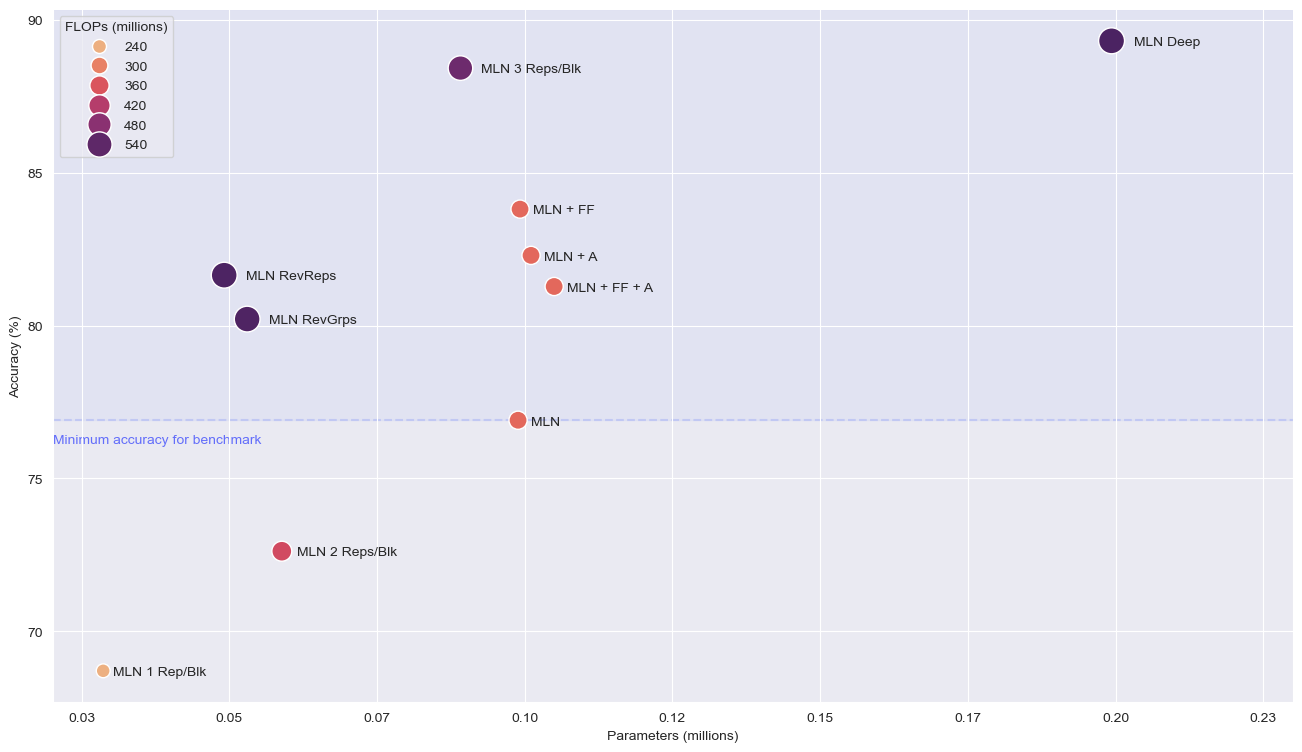

In [3]:
# Create scatter plot of MobileLookNet variations
mobilelooknet_results_df = results_df[0:10]

plt.figure(figsize = (16, 9)) # 16:9 ratio
sns.set_style("darkgrid")
sns.scatterplot(x = "Parameters",
                y = "Accuracy",
                data = mobilelooknet_results_df,
                palette = "flare",
                hue = "FLOPs",
                size = "FLOPs",
                sizes = (100, 350))

# Label models
x = mobilelooknet_results_df.Parameters
y = mobilelooknet_results_df.Accuracy
labels = mobilelooknet_results_df.Model
size = mobilelooknet_results_df.FLOPs
for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + size[i]/150000, y[i]-0.0015))

# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
plt.xlim(right=230000) # workaround to prevent label overflow

# Format labels
plt.xlabel("Parameters (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Format legend
legend = plt.legend(title = 'FLOPs (millions)',
           loc = 'upper left')
for lbl in legend.get_texts():
    label_text = lbl.get_text()
    new_text = f'{int(float(label_text)/1000000)}'
    lbl.set_text(new_text)
    
# Plot area that falls within benchmark
benchmark_accuracy = results_df.loc[results_df['Model'] == 'Base CNN']['Accuracy'].item() - 0.02

plt.axhline(benchmark_accuracy, linestyle = '--', zorder = 0.4, color = '#C1C8F3')

annotation_x_offset = .01
annotation_y_offset = benchmark_accuracy*.01

plt.annotate('Minimum accuracy for benchmark',
             (plt.xlim()[0] + annotation_x_offset, benchmark_accuracy - annotation_y_offset),
             zorder = 0.5,
             color = '#636EFA')

benchmark_accuracy_in_axis_units = (benchmark_accuracy - plt.ylim()[0])/(plt.ylim()[1] - plt.ylim()[0])

plt.axvspan(xmin = 0, xmax = plt.xlim()[1],
            ymin = benchmark_accuracy_in_axis_units, ymax = 1,
            zorder = 0.3,
            alpha = 0.2, color = '#C1C8F3')

# Save figure
plt.savefig(fname = 'mobilelooknet_scatter.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')
plt.show()

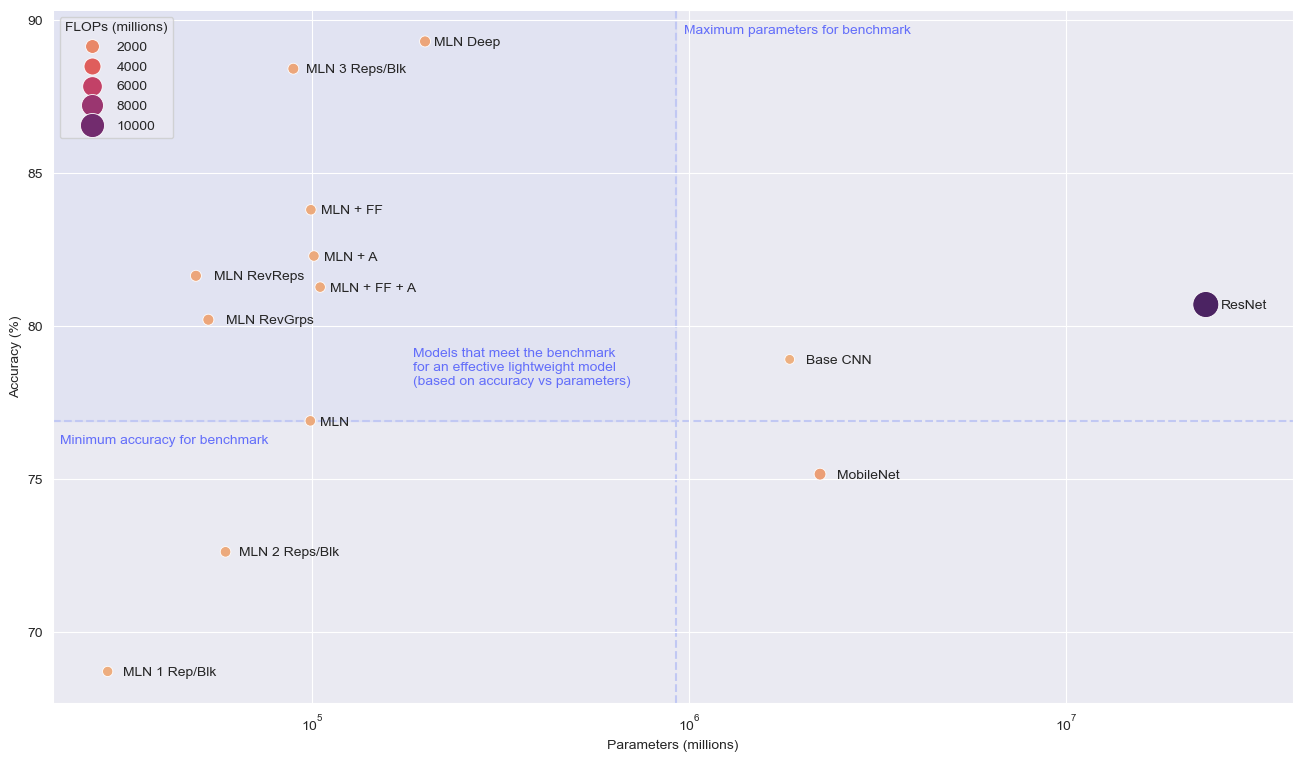

In [4]:
# Create scatter plot of all models
plt.figure(figsize = (16, 9)) # 16:9 ratio
sns.set_style("darkgrid")
sns.scatterplot(x = "Parameters",
                y = "Accuracy",
                data = results_df,
                palette = "flare",
                hue = "FLOPs",
                size = "FLOPs",
                sizes = (50, 350),
                legend='brief')

# Label models
x = results_df.Parameters
y = results_df.Accuracy
labels = results_df.Model
size = results_df.FLOPs
for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + size[i]/150000 + (1.1*x[i])/(log(x[i], 1.5) if x[i] < 10**6 else log(x[i], 4)), y[i]-0.0015))
    
# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
ax.set_xscale('log')
plt.xlim(right=40000000) # workaround to prevent label overflow

# Format labels
plt.xlabel("Parameters (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Format legend
legend = plt.legend(title = 'FLOPs (millions)', loc = 'upper left')
for lbl in legend.get_texts():
    label_text = lbl.get_text()
    new_text = f'{int(float(label_text)/1000000)}'
    lbl.set_text(new_text)
                 
# Plot area that falls within benchmark
benchmark_accuracy = results_df.loc[results_df['Model'] == 'Base CNN']['Accuracy'].item() - 0.02
benchmark_params = results_df.loc[results_df['Model'] == 'Base CNN']['Parameters'].item() / 2

plt.axhline(benchmark_accuracy, linestyle = '--', zorder = 0.4, color = '#C1C8F3')
plt.axvline(benchmark_params, linestyle = '--', zorder = 0.4, color = '#C1C8F3')

annotation_x_offset = benchmark_params*.001
annotation_y_offset = benchmark_accuracy*.01

plt.annotate('Minimum accuracy for benchmark',
             (plt.xlim()[0] + annotation_x_offset, benchmark_accuracy - annotation_y_offset),
             zorder = 0.5,
             color = '#636EFA')
plt.annotate('Maximum parameters for benchmark',
             (benchmark_params + annotation_x_offset*50, plt.ylim()[1] - annotation_y_offset),
             zorder = 0.5,
             color = '#636EFA')

benchmark_accuracy_in_axis_units = (benchmark_accuracy - plt.ylim()[0])/(plt.ylim()[1] - plt.ylim()[0])

plt.axvspan(xmin = 0, xmax = benchmark_params,
            ymin = benchmark_accuracy_in_axis_units, ymax = 1,
            zorder = 0.3,
            alpha = 0.2, color = '#C1C8F3')

text_x_offset = benchmark_params*.8
text_y_offset = benchmark_accuracy*.015
plt.annotate('Models that meet the benchmark\nfor an effective lightweight model\n(based on accuracy vs parameters)',
             (benchmark_params - text_x_offset, benchmark_accuracy + text_y_offset),
             color = '#636EFA')

# Save figure
plt.savefig(fname = 'all_scatter.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')
plt.show()

# Plot scaling law of MobileLookNets based on number of block repetitions

In [5]:
mobilelooknet_scaled_models = ['MLN', 'MLN 1 Rep/Blk', 'MLN 2 Reps/Blk', 'MLN 3 Reps/Blk', 'MLN Deep']
mobilelooknet_scaled_df = results_df.loc[results_df['Model'].isin(mobilelooknet_scaled_models)]
mobilelooknet_scaled_df.reset_index(drop=True, inplace=True)

constant_rep_models = ['MLN 1 Rep/Blk', 'MLN 2 Reps/Blk', 'MLN 3 Reps/Blk']
mobilelooknet_scaled_df['Type'] = mobilelooknet_scaled_df.apply(lambda x: 'Constant Reps/Blk' if x.Model in constant_rep_models else 'Increasing Reps/Blk', axis=1)

mobilelooknet_scaled_df

C:\Users\Irish\AppData\Local\Temp\ipykernel_18424\3412628900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobilelooknet_scaled_df['Type'] = mobilelooknet_scaled_df.apply(lambda x: 'Constant Reps/Blk' if x.Model in constant_rep_models else 'Increasing Reps/Blk', axis=1)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1,FLOPs,Parameters,Type
0,MLN,0.76904,0.71451,0.89596,0.70778,0.76343,332491680,98882,Increasing Reps/Blk
1,MLN 1 Rep/Blk,0.68710,0.68309,0.65642,0.70503,0.58150,237895872,28666,Constant Reps/Blk
2,MLN 2 Reps/Blk,0.72621,0.71816,0.82160,0.67318,0.71810,378413408,58898,Constant Reps/Blk
3,MLN 3 Reps/Blk,0.88420,0.84635,0.84981,0.90381,0.83770,518930944,89130,Constant Reps/Blk
4,MLN Deep,0.89312,0.86124,0.88181,0.90191,0.85967,567605024,199330,Increasing Reps/Blk


C:\Users\Irish\anaconda3\envs\conv_env\lib\site-packages\seaborn\regression.py:264: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


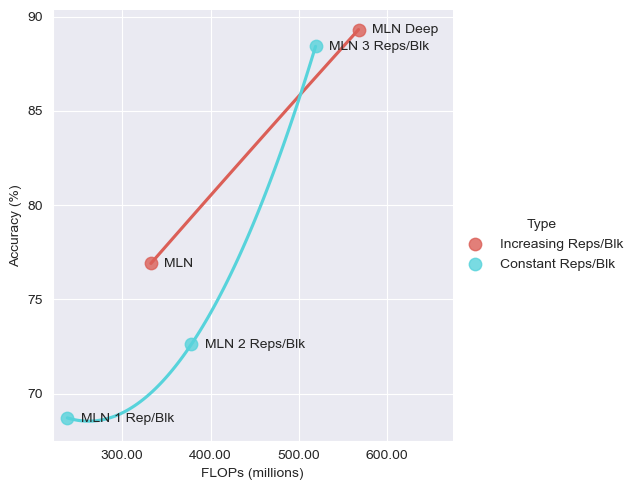

In [6]:
# Accuracy vs FLOPs
sns.set_style("darkgrid")
sns.lmplot(x="FLOPs",
           y="Accuracy",
           hue="Type",
           palette="hls",
           data=mobilelooknet_scaled_df,
           order=2,
           ci=None,
           scatter_kws={"s": 80});

# Label models
x = mobilelooknet_scaled_df.FLOPs
y = mobilelooknet_scaled_df.Accuracy
labels = mobilelooknet_scaled_df.Model

for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + 15000000, y[i] - .002))

# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
ax.set_xlim(right=plt.xlim()[1]+90000000) # workaround to prevent label overflow

# Format labels
plt.xlabel("FLOPs (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Save figure
plt.savefig(fname = 'rep_variants_acc_vs_flops.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')

plt.show()

C:\Users\Irish\anaconda3\envs\conv_env\lib\site-packages\seaborn\regression.py:264: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)


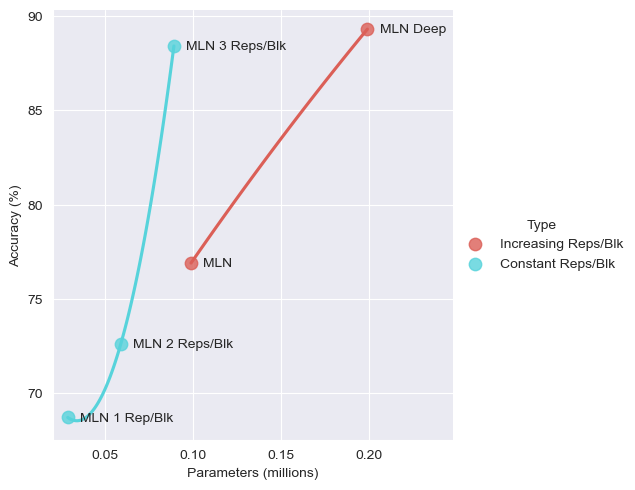

In [7]:
# Accuracy vs Parameters
sns.set_style("darkgrid")
sns.lmplot(x="Parameters",
           y="Accuracy",
           hue="Type",
           palette="hls",
           data=mobilelooknet_scaled_df,
           order=2,
           ci=None,
           scatter_kws={"s": 80});

# Label models
x = mobilelooknet_scaled_df.Parameters
y = mobilelooknet_scaled_df.Accuracy
labels = mobilelooknet_scaled_df.Model

for i in range(len(x)): 
    plt.annotate(labels[i], (x[i] + 7000, y[i] - .002))

# Format numbers on axes
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y*100)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000)))
ax.set_xlim(right=plt.xlim()[1]+40000) # workaround to prevent label overflow

# Format labels
plt.xlabel("Parameters (millions)", fontsize = 10)
plt.ylabel("Accuracy (%)", fontsize = 10)

# Save figure
plt.savefig(fname = 'rep_variants_acc_vs_params.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')

plt.show()

# Plot scaling law of MobileLookNets based on number of block repetitions (constant reps/blk only)

In [30]:
mobilelooknet_constant_reps_df = mobilelooknet_scaled_df.loc[mobilelooknet_scaled_df['Type'] == 'Constant Reps/Blk']
mobilelooknet_constant_reps_df['Reps/Blk'] = [1, 2, 3]
mobilelooknet_constant_reps_df.drop(columns=['Model', 'Type'], inplace = True)

mobilelooknet_constant_reps_df

C:\Users\Irish\AppData\Local\Temp\ipykernel_18424\2039652070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobilelooknet_constant_reps_df['Reps/Blk'] = [1, 2, 3]
C:\Users\Irish\AppData\Local\Temp\ipykernel_18424\2039652070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobilelooknet_constant_reps_df.drop(columns=['Model', 'Type'], inplace = True)


,Accuracy,Precision,Sensitivity,Specificity,F1,FLOPs,Parameters,Reps/Blk
1,0.68710,0.68309,0.65642,0.70503,0.5815,237895872,28666,1
2,0.72621,0.71816,0.82160,0.67318,0.7181,378413408,58898,2
3,0.88420,0.84635,0.84981,0.90381,0.8377,518930944,89130,3


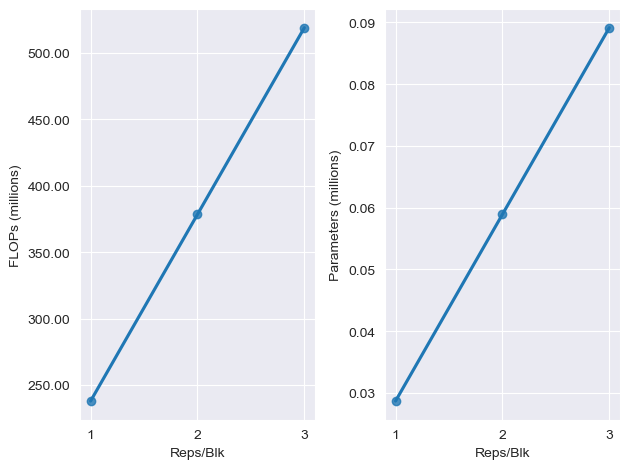

In [58]:
# Blks/Rep vs Computational Performance
fig, axs = plt.subplots(1, 2, sharex=True, sharey=False)

computation_metrics = ['FLOPs', 'Parameters']
computation_metrics_y = ['FLOPs (millions)', 'Parameters (millions)']

for ax, i in zip(axs.flat, range(len(classification_metrics))):
    sns.regplot(x="Reps/Blk",
           y=computation_metrics[i],
           data=mobilelooknet_constant_reps_df,
           order=2,
           ci=None,
           ax=ax);
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000)))
    ax.set_ylabel(computation_metrics_y[i], fontsize = 10)

plt.tight_layout()

# Save figure
plt.savefig(fname = 'rep_variants_constant_comp.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')

plt.show()

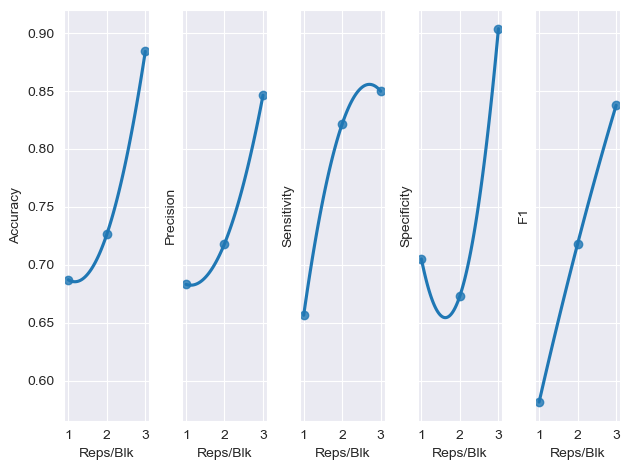

In [54]:
# Blks/Rep vs Classification Performance
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True)

classification_metrics = ['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1']

for ax, i in zip(axs.flat, range(len(classification_metrics))):
    sns.regplot(x="Reps/Blk",
           y=classification_metrics[i],
           data=mobilelooknet_constant_reps_df,
           order=2,
           ci=None,
           ax=ax);
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()

# Save figure
plt.savefig(fname = 'rep_variants_constant_classif.svg',
            format = 'svg',
            pad_inches = 0,
            bbox_inches='tight')

plt.show()